# 확률로 원의 넓이 구해보기

> *목표*
>
> *확률을 통해 원의 넓이를 구해보자.*

    1. 정사각형 안에 사각형의 변과 같은 지름을 가진 원을 그린다.
    2. 정사각형 안에 임의의 점을 그린다.
    3. 그린 점 중에 원 안에 있는 점의 개수를 구해서 점이 원 안에 들어갈 확률을 구한다.
    4. 위에서 구한 확률을 통해 원의 넓이를 구해보자!

## 원 그리기

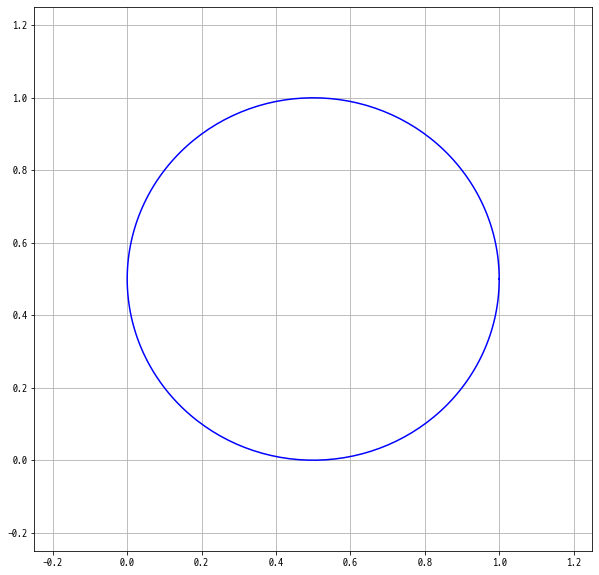

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 원을 만들어주는 함수
def make_circle(c, r):
    theta = np.linspace(0, 2 * np.pi, 256)
    x = r * np.cos(theta)
    y = r * np.sin(theta)    
    return np.vstack((x, y)).T + c

c = np.array([0.5, 0.5]) # 원의 중심점
r = 0.5 # 반지름

circle = make_circle(c, r)

plt.figure(figsize = (10,10))
plt.plot(circle[:,0], circle[:, 1], 'b-')
# plt.scatter(dot[:, 0], dot[:, 1])
plt.grid()
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)
plt.show()

In [4]:
# 원의 넓이
0.5 * 0.5 * 3.14

0.785

## 사각형 그리기

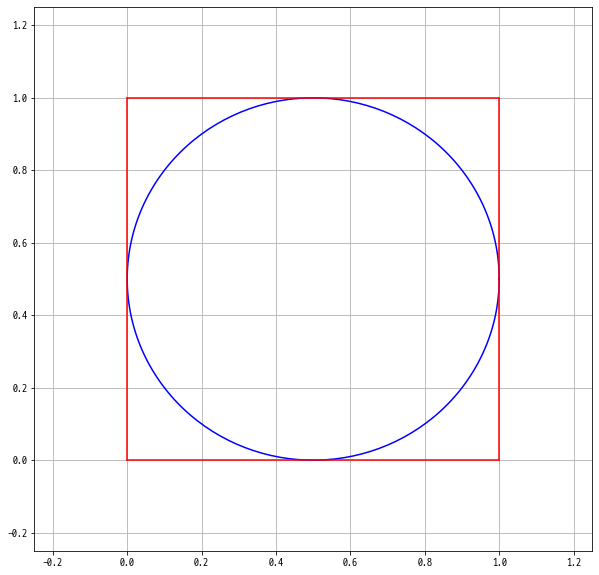

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 원을 만들어주는 함수
def make_circle(c, r):
    theta = np.linspace(0, 2 * np.pi, 256)
    x = r * np.cos(theta)
    y = r * np.sin(theta)    
    return np.vstack((x, y)).T + c

c = np.array([0.5, 0.5]) # 원의 중심점
r = 0.5 # 반지름

circle = make_circle(c, r)

plt.figure(figsize = (10,10))
# 원 그리기
plt.plot(circle[:,0], circle[:, 1], 'b-')
# 사각형 그리기
plt.plot([0,1], [1, 1], 'r-')
plt.plot([1,1], [0, 1], 'r-')
plt.plot([0,1], [0, 0], 'r-')
plt.plot([0,0], [0, 1], 'r-')

plt.grid()
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)
plt.show()

In [6]:
print('사각형의 넓이는 {}'.format(1 * 1))
print('원의 넓이는 {}'.format(r * r * 3.14))

사각형의 넓이는 1
원의 넓이는 0.785


한 변이 1인 사각형과 반지름이 0.5인 원을 그렸다.

단위를 cm로 가정했을 때,

사각형의 넓이는 1cm\*\*2, 원의 넓이는 0.785cm\*\*2이다.

## 사각형 안에 임의의 점 뿌리기

In [7]:
# 0부터 1까지 랜덤한 두 개의 실수를 생성한다.
dot = np.random.rand(100, 2) # 임의의 수 100개 만들기
print(len(dot), dot.shape)
dot[:5]

100 (100, 2)


array([[0.05928899, 0.92715908],
       [0.88730933, 0.24842185],
       [0.8639172 , 0.90815873],
       [0.93338142, 0.25757366],
       [0.33683852, 0.19214875]])

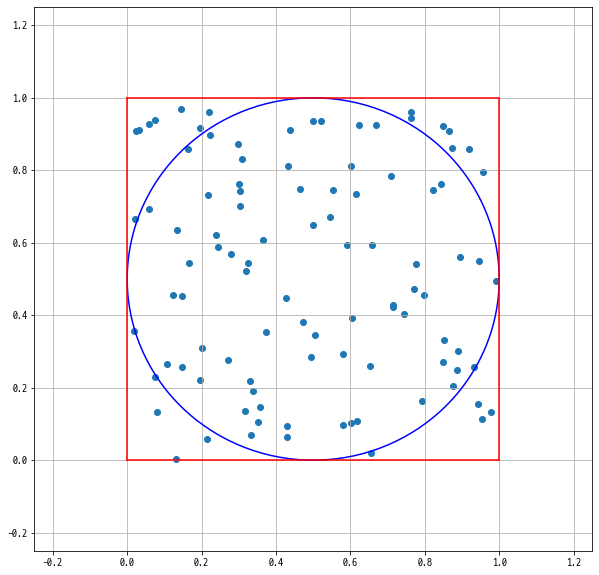

In [8]:
# 원을 만들어주는 함수
def make_circle(c, r):
    theta = np.linspace(0, 2 * np.pi, 256)
    x = r * np.cos(theta)
    y = r * np.sin(theta)    
    return np.vstack((x, y)).T + c

c = np.array([0.5, 0.5]) # 원의 중심점
r = 0.5 # 반지름

circle = make_circle(c, r)

plt.figure(figsize = (10,10))
# 원 그리기
plt.plot(circle[:,0], circle[:, 1], 'b-')
# 사각형 그리기
plt.plot([0,1], [1, 1], 'r-')
plt.plot([1,1], [0, 1], 'r-')
plt.plot([0,1], [0, 0], 'r-')
plt.plot([0,0], [0, 1], 'r-')
# 랜덤한 점 그리기
plt.scatter(dot[:, 0], dot[:, 1]) # 100개

plt.grid()
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)
plt.show()

사각형 안에 랜덤하게 생성한 100개의 점을 뿌렸다.

다음은 원 안에 있는 점이 몇 개인지 점과 중심점과의 거리를 이용해서 구해보자.

In [10]:
# 중심점과 점 사이의 거리 구하기
# 0.5 이내에 있어야 원 안에 있는 점이다.
point = np.array([0.5, 0.5]) # 중심점
point

array([0.5, 0.5])

In [13]:
# 피타고라스의 공식을 이용해서 점과 점 사이의 거리를 구해준다.
a = point[0] - dot[0, 0] # x 좌표의 거리
b = point[1] - dot[0, 1] # y 좌표의 거리

import math
math.sqrt((a * a) + (b * b))

0.6137516373522035

In [14]:
# 원 안의 임의의 점 개수를 구하는 함수 만들기

count = 0 # 점의 개수 카운트

for i in range(100):
    a = point[0] - dot[i, 0]
    b = point[1] - dot[i, 1]
    dis = math.sqrt(a * a + b * b) # 거리
    
    if dis <= 0.5: # 중심점과의 거리가 0.5 이하인 점
        count += 1
count

76

100개 중 76개의 점이 원 안에 들어가 있다.

즉, 76%의 확률로 점이 원 안에 들어간다는 말과 같다.

그럼 사각형의 넓이에 점이 원에 들어갈 확률을 곱하면 원의 넓이가 되지 않을까?

그럼 사각형의 넓이에 점이 원 안에 들어갈 확률을 곱하면?

In [15]:
1 * 0.76

0.76

원의 넓이 0.785와 차이가 있다. 점의 개수를 더 늘려보자.

## 점의 개수 늘려보기

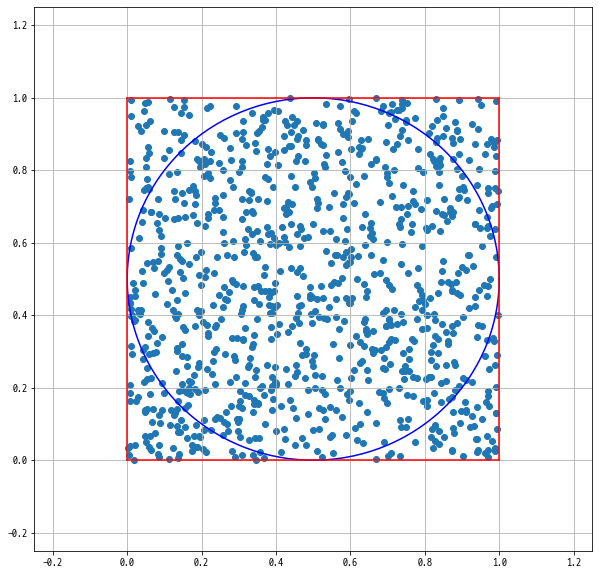

778


In [44]:
# 점 1,000개
dot = np.random.rand(1000, 2)

# 원을 만들어주는 함수
def make_circle(c, r):
    theta = np.linspace(0, 2 * np.pi, 256)
    x = r * np.cos(theta)
    y = r * np.sin(theta)    
    return np.vstack((x, y)).T + c

c = np.array([0.5, 0.5]) # 원의 중심점
r = 0.5 # 반지름

circle = make_circle(c, r)

plt.figure(figsize = (10,10))
# 원 그리기
plt.plot(circle[:,0], circle[:, 1], 'b-')
# 사각형 그리기
plt.plot([0,1], [1, 1], 'r-')
plt.plot([1,1], [0, 1], 'r-')
plt.plot([0,1], [0, 0], 'r-')
plt.plot([0,0], [0, 1], 'r-')
# 랜덤한 점 그리기
plt.scatter(dot[:, 0], dot[:, 1])

plt.grid()
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)
plt.show()

# 원 안의 임의의 점 개수를 구하는 함수
count = 0 # 점의 개수 카운트
for i in range(len(dot)):
    a = point[0] - dot[i, 0]
    b = point[1] - dot[i, 1]
    dis = math.sqrt(a * a + b * b) # 거리
    
    if dis <= 0.5: # 중심점과의 거리가 0.5 이하인 점
        count += 1
print(count)

이번에는 778개의 점이 원 안에 들어갔다.

이번에는 0.778로 0.785와 근접해졌지만, 아직 조금 부족하다.

더.. 더... 늘려보자.. 화끈하게

이번에는 10,000개다.

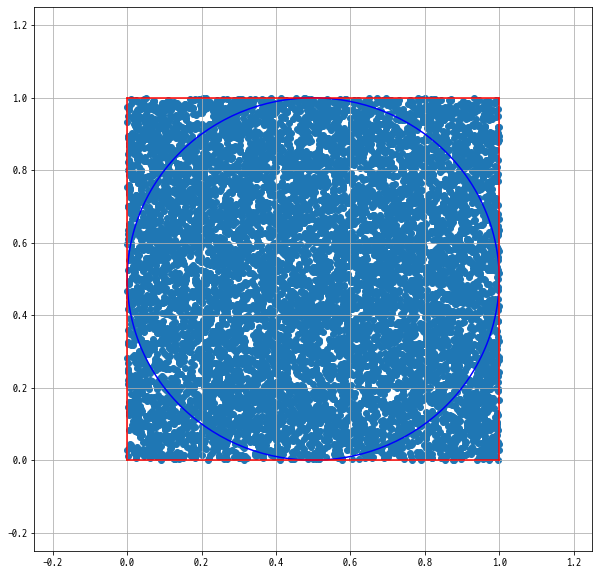

7884

In [19]:
# 점 10,000개
dot = np.random.rand(10000, 2)

# 원을 만들어주는 함수
def make_circle(c, r):
    theta = np.linspace(0, 2 * np.pi, 256)
    x = r * np.cos(theta)
    y = r * np.sin(theta)    
    return np.vstack((x, y)).T + c

c = np.array([0.5, 0.5]) # 원의 중심점
r = 0.5 # 반지름

circle = make_circle(c, r)

plt.figure(figsize = (10,10))
# 원 그리기
plt.plot(circle[:,0], circle[:, 1], 'b-')
# 사각형 그리기
plt.plot([0,1], [1, 1], 'r-')
plt.plot([1,1], [0, 1], 'r-')
plt.plot([0,1], [0, 0], 'r-')
plt.plot([0,0], [0, 1], 'r-')
# 랜덤한 점 그리기
plt.scatter(dot[:, 0], dot[:, 1])

plt.grid()
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)
plt.show()

# 원 안의 임의의 점 개수를 구하는 함수
count = 0 # 점의 개수 카운트
for i in range(len(dot)):
    a = point[0] - dot[i, 0]
    b = point[1] - dot[i, 1]
    dis = math.sqrt(a * a + b * b) # 거리
    
    if dis <= 0.5: # 중심점과의 거리가 0.5 이하인 점
        count += 1
count

오! 이번에는 0.7884로 0.785와 거의 근접하다.

마지막으로 딱.. 딱 한 번만 더....

화끈하게 100,000개!

100000


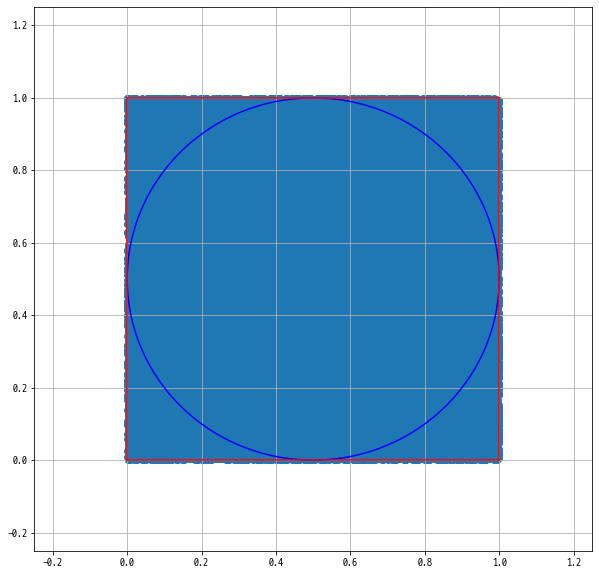

78564

In [23]:
# 점 100,000개
dot = np.random.rand(100000, 2)
print(len(dot))
# 원을 만들어주는 함수
def make_circle(c, r):
    theta = np.linspace(0, 2 * np.pi, 256)
    x = r * np.cos(theta)
    y = r * np.sin(theta)    
    return np.vstack((x, y)).T + c

c = np.array([0.5, 0.5]) # 원의 중심점
r = 0.5 # 반지름

circle = make_circle(c, r)

plt.figure(figsize = (10,10))
# 원 그리기
plt.plot(circle[:,0], circle[:, 1], 'b-')
# 사각형 그리기
plt.plot([0,1], [1, 1], 'r-')
plt.plot([1,1], [0, 1], 'r-')
plt.plot([0,1], [0, 0], 'r-')
plt.plot([0,0], [0, 1], 'r-')
# 랜덤한 점 그리기
plt.scatter(dot[:, 0], dot[:, 1])

plt.grid()
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)
plt.show()

# 원 안의 임의의 점 개수를 구하는 함수
count = 0 # 점의 개수 카운트
for i in range(len(dot)):
    a = point[0] - dot[i, 0]
    b = point[1] - dot[i, 1]
    dis = math.sqrt(a * a + b * b) # 거리
    
    if dis <= 0.5: # 중심점과의 거리가 0.5 이하인 점
        count += 1
count

0.78564로 거의 정말 거의 근접한 원의 넓이를 구할 수 있었다.